<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/Ajuste_MKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

In [ ]:
!pip install arch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from arch import arch_model
import warnings
warnings.filterwarnings("ignore")
sns.set()

#Cargamos información de ventas

In [ ]:
Ventas_csv = pd.read_csv("/content/drive/My Drive/datasets/queryVentasMensuakes.csv")
#Copiamos la información en otra variable
df_Ventas=Ventas_csv.copy()

In [ ]:
df_Ventas.head().style

,Fecha_Corte,Venta
0,31/01/2018,8524355533
1,28/02/2018,7025900936
2,31/03/2018,8319867864
3,30/04/2018,8104417918
4,31/05/2018,9419733969


In [ ]:
#Promedio de ventas 2018
df_Ventas.Venta[0:11].mean()

8834512495.09091

In [ ]:
#Promedio de ventas 2019
df_Ventas.Venta[12:23].mean()

9713780018.545454

In [ ]:
df_Ventas.Venta[0:11].mean()/df_Ventas.Venta[12:23].mean()

0.9094824546390946

In [ ]:
#Promedio de ventas 2018-2019
df_Ventas.Venta.mean()

10042530033.708334

In [ ]:
df_Ventas.Fecha_Corte = pd.to_datetime(df_Ventas.Fecha_Corte, dayfirst = True)
df_Ventas.set_index("Fecha_Corte", inplace=True)

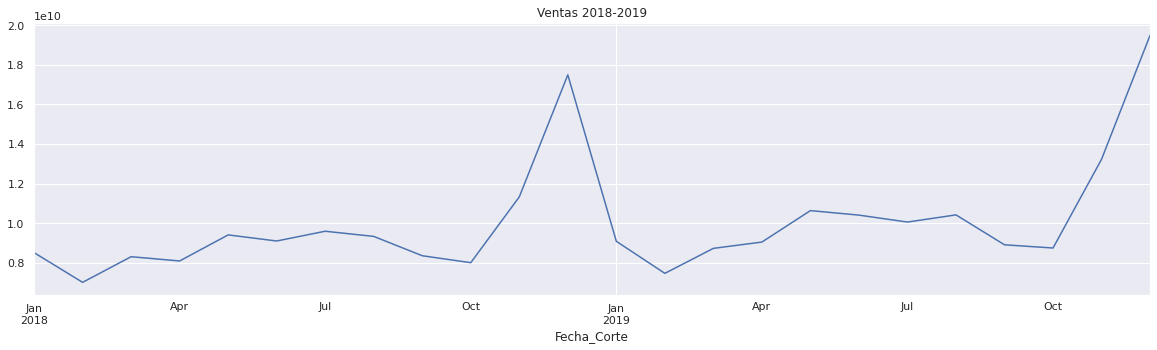

In [ ]:
df_Ventas.Venta.plot(figsize=(20,5), title = "Ventas 2018-2019")
plt.show()

# Holt-Winters Methods
**Promedios móviles ponderados exponencialmente** (EWMA) que es un <em> Suavizado exponencial simple </em> usando un solo factor de suavizado $\alpha$ (alpha).

In [ ]:
#Calculamos el promedio móvil ponderado mediente la función .ewn() y también con la libreria simpleExpSmoooting 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Indicamos la ventana temporal
span = 23
alpha = 2/(span+1)

df_Ventas = df_Ventas.rename(columns={'Venta':'mul'})

#Añadimos las series suavizadas al df
df_Ventas['EWMA12'] = df_Ventas['mul'].ewm(span=23,adjust=False).mean()

#Le pasamos el nivel de suavizado de alpha
#Si optimized=Trues calcula los parametros del modelos utilizando máxima verosimilitud
df_Ventas['SES12']=SimpleExpSmoothing(df_Ventas['mul']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
#df_Ventas['tes']=ExponentialSmoothing(df_Ventas['Venta'],trend='add',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
df_Ventas['Venta']=ExponentialSmoothing(df_Ventas['mul'],trend='mul').fit().fittedvalues.shift(-1)



In [ ]:
df_Ventas['Venta']

Fecha_Corte
2018-01-31    8.731007e+09
2018-02-28    7.196226e+09
2018-03-31    8.521562e+09
2018-04-30    8.300889e+09
2018-05-31    9.648091e+09
2018-06-30    9.332904e+09
2018-07-31    9.837347e+09
2018-08-31    9.570652e+09
2018-09-30    8.571518e+09
2018-10-31    8.212191e+09
2018-11-30    1.161312e+10
2018-12-31    1.792017e+10
2019-01-31    9.317183e+09
2019-02-28    7.661078e+09
2019-03-31    8.952393e+09
2019-04-30    9.278077e+09
2019-05-31    1.090371e+10
2019-06-30    1.067031e+10
2019-07-31    1.031228e+10
2019-08-31    1.068263e+10
2019-09-30    9.136364e+09
2019-10-31    8.971003e+09
2019-11-30    1.355689e+10
2019-12-31             NaN
Name: Venta, dtype: float64

In [ ]:
df_Ventas['Venta'][23]=df_Ventas['Venta'][11]*.11+df_Ventas['Venta'][11]

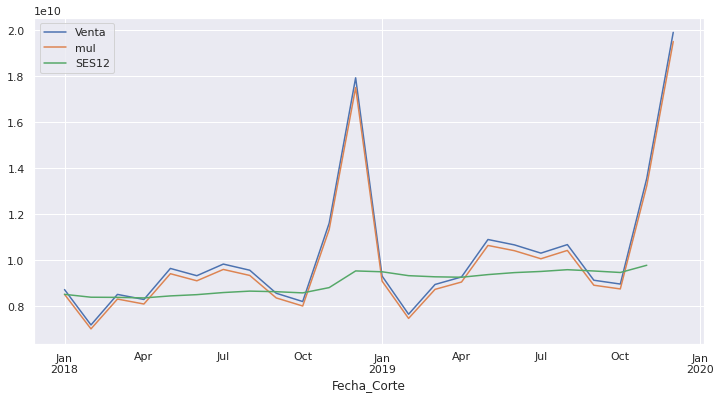

In [ ]:
#Observamos la serie original y también el suavizamiento exponencial simple y doble
#Apreciamos que la serie original presenta una tendencia creciente
df_Ventas[['Venta','mul','SES12']].plot(figsize=(12,6)).autoscale(axis='x',tight=None);





In [ ]:
#x=ExponentialSmoothing(df_Ventas['Venta'],trend='mul').fit().fittedvalues.shift(-1)
#x-df_Ventas.Venta

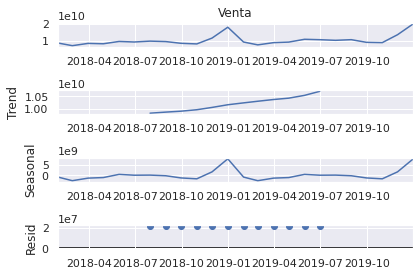

In [ ]:
#Podemos observar el componente de tendencia
#Componente de Estacionalidad
#Componente residual
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
s_dec_additive=seasonal_decompose(df_Ventas['Venta'],model='additive')
s_dec_additive.plot()
plt.show()

# Cargamos información de medios

**Nota:**

**Operación_mkt=** mercadotenia + investgación de mercados + asesoría de medios publicitarios

**Medios_impresos=** prensa + impresos

**Producción=** agencias publicitarias + fotografías + producción

**Otros=** mkt social + relaciones públicas + cánada 


In [ ]:
Medios_csv = pd.read_csv("/content/drive/My Drive/datasets/Información_medios.csv")
#Copiamos la información en otra variable
df_Medios=Medios_csv.copy()

In [ ]:
#Convertimos la fecha a formato fecha
Medios_csv.Fecha = pd.to_datetime(Medios_csv.Fecha, dayfirst = True)
#Convertimos la fecha a formato fecha
df_Medios.Fecha = pd.to_datetime(df_Medios.Fecha, dayfirst = True)
#Indexamos la fecha
df_Medios.set_index("Fecha", inplace=True)

In [ ]:
df_Medios.head().style

,medio publicitario,Gasto
Fecha,,
2018-01-01 00:00:00,Television,220000000
2018-02-01 00:00:00,Television,11069403
2018-03-01 00:00:00,Television,7244928
2018-04-01 00:00:00,Television,60000
2018-05-01 00:00:00,Television,550000


In [ ]:
#Frecuencia de aparición de medios
df_Medios['medio publicitario'].value_counts()

Anuncios exteriores    24
medios_impresos        24
Marketing online       24
produccion             24
promociones            24
Television             24
Radio                  24
operacion_mkt          24
Marcas exclusivas      24
Periodico Coppel       24
Otros                  24
Name: medio publicitario, dtype: int64

Text(0, 0.5, 'Medios publicitarios')

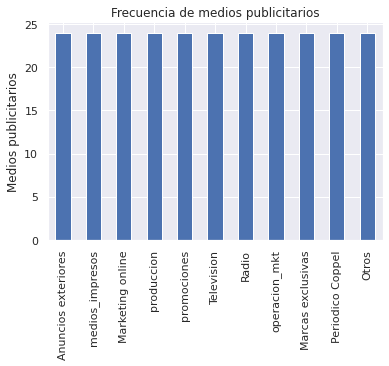

In [ ]:
fig = df_Medios['medio publicitario'].value_counts().plot.bar()
fig.set_title('Frecuencia de medios publicitarios')
fig.set_ylabel('Medios publicitarios')

In [ ]:
#Total de gasto por medio
fig=df_Medios.groupby(['medio publicitario'])['Gasto'].sum()
fig.sort_values(ascending=False)

medio publicitario
Periodico Coppel       918103403
Television             758718916
produccion             367729104
Marketing online       227037258
Anuncios exteriores    218607187
Radio                  186006898
operacion_mkt          113694260
Marcas exclusivas      105223754
Otros                   62744370
medios_impresos         45075720
promociones             36118706
Name: Gasto, dtype: int64

In [ ]:
#Porcentaje de participación del gasto por medio con respecto de la inversión 2018-2019
fig=df_Medios.groupby(['medio publicitario'])['Gasto'].sum()/df_Medios['Gasto'].sum()
fig.sort_values(ascending=False)

medio publicitario
Periodico Coppel       0.302101
Television             0.249656
produccion             0.121001
Marketing online       0.074706
Anuncios exteriores    0.071933
Radio                  0.061205
operacion_mkt          0.037411
Marcas exclusivas      0.034624
Otros                  0.020646
medios_impresos        0.014832
promociones            0.011885
Name: Gasto, dtype: float64

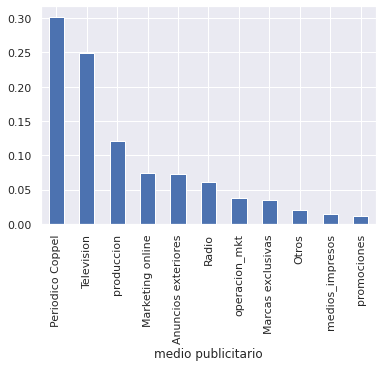

In [ ]:
#Peso del gasto por medio con respecto del gasto total
#fig = df_Medios.groupby(['medio publicitario'])['Gasto'].sum()

fig.sort_values(ascending=False).plot.bar()


Text(0, 0.5, 'Gasto')

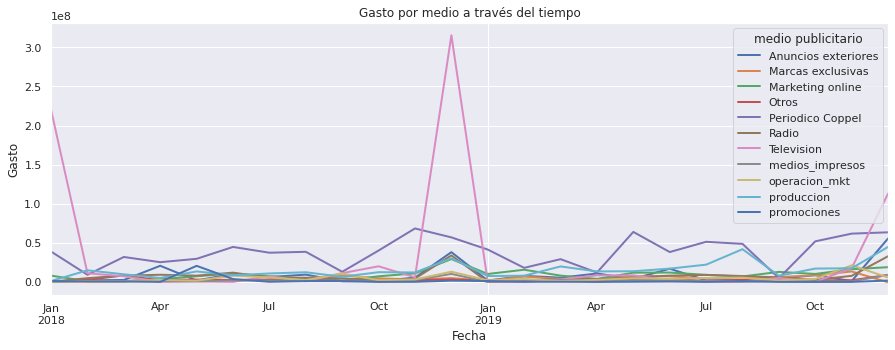

In [ ]:
fig = Medios_csv.groupby(['Fecha','medio publicitario'])['Gasto'].sum().unstack().plot(
    figsize=(15, 5), linewidth=2)
fig.set_title('Gasto por medio a través del tiempo')
fig.set_ylabel('Gasto')

#Cargamos información de indicadores externos

In [ ]:
TasaDesempleo_csv = pd.read_csv("/content/drive/My Drive/datasets/query_tasadedesempleo_192708.csv")
#Copiamos la información en otra variable
df_TasaDesempleo=TasaDesempleo_csv.copy()

In [ ]:
#Convertimos la fecha a formato fecha
df_TasaDesempleo.Fecha = pd.to_datetime(df_TasaDesempleo.Fecha, dayfirst = True)
#Indexamos la fecha
df_TasaDesempleo.set_index("Fecha", inplace=True)

In [ ]:
df_TasaDesempleo.head().style

,Frecuencia,Valor
Fecha,,
2018-01-01 00:00:00,Mensual,3.389192
2018-02-01 00:00:00,Mensual,3.205057
2018-03-01 00:00:00,Mensual,2.939629
2018-04-01 00:00:00,Mensual,3.398701
2018-05-01 00:00:00,Mensual,3.221848


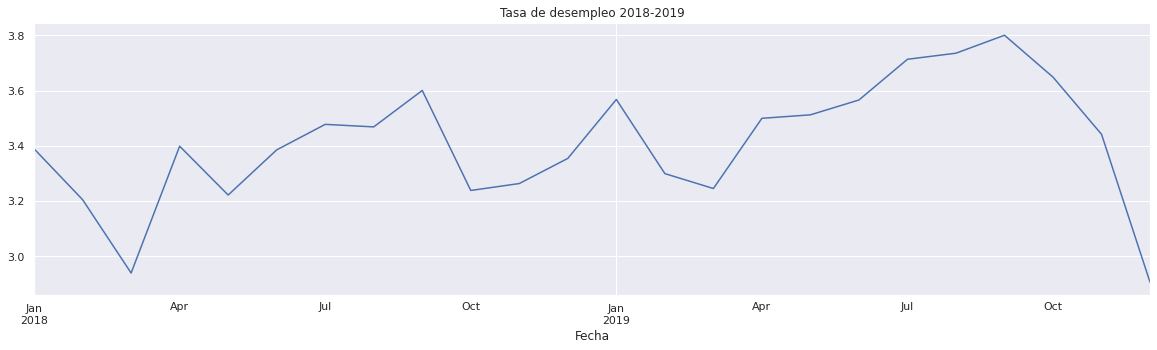

In [ ]:
df_TasaDesempleo.Valor.plot(figsize=(20,5), title = "Tasa de desempleo 2018-2019")
plt.show()

In [ ]:
mkt_externas_csv = pd.read_csv("/content/drive/My Drive/datasets/Información_mkt.csv")
#Copiamos la información en otra variable
df_externas_mkt=mkt_externas_csv.copy()
df_externas_mkt.head().style

,Fecha_Corte,Venta,Anuncios_exteriores,Marcas_exclusivas,Marketing_online,medios_impresos,operacion_mkt,Otros,Periodico_Coppel,produccion,promociones,Radio,Television,Tasa_Desempleo,Inflacion
0,31/01/2018,8524355533,139257,535162,8016888,566,441765,473132,38827409,1196028,1171021,201178,220000000,3.389192,0.530000
1,28/02/2018,7025900936,2026434,403225,879590,1207826,1246295,2608239,9151272,14819801,674395,4821474,11069403,3.205057,0.380000
2,31/03/2018,8319867864,2458695,687411,1057309,684618,1123035,8470172,31895170,9757559,661153,8086161,7244928,2.939629,0.320000
3,30/04/2018,8104417918,20650553,3240038,3360935,981647,2530751,1916052,25227800,5042073,99574,9174422,60000,3.398701,-0.340000
4,31/05/2018,9419733969,1743612,2520233,7255286,850575,1636500,2942507,29548505,13415805,20560634,8022245,550000,3.221848,-0.160000


In [ ]:
df_externas_mkt['Fecha_Corte'] = pd.to_datetime(df_externas_mkt.Fecha_Corte, dayfirst = True)


In [ ]:
#Indexamos la columna "date" para una mejor visualización de los datos
df_externas_mkt.set_index("Fecha_Corte", inplace=True)

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_externas_mkt['norm_Venta'] = min_max_scaler.fit_transform(df_externas_mkt['Venta'].values.reshape(-1,1))
df_externas_mkt['norm_TasaDesempleo'] = min_max_scaler.fit_transform(df_externas_mkt['Tasa_Desempleo'].values.reshape(-1,1))
df_externas_mkt['norm_inflacion'] = min_max_scaler.fit_transform(df_externas_mkt['Inflacion'].values.reshape(-1,1))
df_externas_mkt.head().style


,Venta,Anuncios_exteriores,Marcas_exclusivas,Marketing_online,medios_impresos,operacion_mkt,Otros,Periodico_Coppel,produccion,promociones,Radio,Television,Tasa_Desempleo,Inflacion,norm_Venta,norm_TasaDesempleo,norm_inflacion
Fecha_Corte,,,,,,,,,,,,,,,,,
2018-01-31 00:00:00,8524355533,139257,535162,8016888,566,441765,473132,38827409,1196028,1171021,201178,220000000,3.389192,0.530000,0.120188,0.540450,0.731092
2018-02-28 00:00:00,7025900936,2026434,403225,879590,1207826,1246295,2608239,9151272,14819801,674395,4821474,11069403,3.205057,0.380000,0.000000,0.334572,0.605042
2018-03-31 00:00:00,8319867864,2458695,687411,1057309,684618,1123035,8470172,31895170,9757559,661153,8086161,7244928,2.939629,0.320000,0.103787,0.037799,0.554622
2018-04-30 00:00:00,8104417918,20650553,3240038,3360935,981647,2530751,1916052,25227800,5042073,99574,9174422,60000,3.398701,-0.340000,0.086506,0.551083,0.000000
2018-05-31 00:00:00,9419733969,1743612,2520233,7255286,850575,1636500,2942507,29548505,13415805,20560634,8022245,550000,3.221848,-0.160000,0.192005,0.353345,0.151261


In [ ]:
df_externas_mkt['norm_AnunciosExteriores'] = min_max_scaler.fit_transform(df_externas_mkt['Anuncios_exteriores'].values.reshape(-1,1))
df_externas_mkt['norm_MarcasExclusivas'] = min_max_scaler.fit_transform(df_externas_mkt['Marcas_exclusivas'].values.reshape(-1,1))
df_externas_mkt['norm_MarketingOnline'] = min_max_scaler.fit_transform(df_externas_mkt['Marketing_online'].values.reshape(-1,1))
df_externas_mkt['norm_MediosImpresos'] = min_max_scaler.fit_transform(df_externas_mkt['medios_impresos'].values.reshape(-1,1))
df_externas_mkt['norm_OperacionMKT'] = min_max_scaler.fit_transform(df_externas_mkt['operacion_mkt'].values.reshape(-1,1))
df_externas_mkt['norm_Otros'] = min_max_scaler.fit_transform(df_externas_mkt['Otros'].values.reshape(-1,1))
df_externas_mkt['norm_PeriodicoCoppel'] = min_max_scaler.fit_transform(df_externas_mkt['Periodico_Coppel'].values.reshape(-1,1))
df_externas_mkt['norm_Produccion'] = min_max_scaler.fit_transform(df_externas_mkt['produccion'].values.reshape(-1,1))
df_externas_mkt['norm_Promociones'] = min_max_scaler.fit_transform(df_externas_mkt['promociones'].values.reshape(-1,1))
df_externas_mkt['norm_Radio'] = min_max_scaler.fit_transform(df_externas_mkt['Radio'].values.reshape(-1,1))
df_externas_mkt['norm_Television'] = min_max_scaler.fit_transform(df_externas_mkt['Television'].values.reshape(-1,1))


df_externas_mkt.head().style


,Venta,Anuncios_exteriores,Marcas_exclusivas,Marketing_online,medios_impresos,operacion_mkt,Otros,Periodico_Coppel,produccion,promociones,Radio,Television,Tasa_Desempleo,Inflacion,norm_Venta,norm_TasaDesempleo,norm_inflacion,norm_AnunciosExteriores,norm_MarcasExclusivas,norm_MarketingOnline,norm_MediosImpresos,norm_OperacionMKT,norm_Otros,norm_PeriodicoCoppel,norm_Produccion,norm_Promociones,norm_Radio,norm_Television
Fecha_Corte,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-31 00:00:00,8524355533,139257,535162,8016888,566,441765,473132,38827409,1196028,1171021,201178,220000000,3.389192,0.530000,0.120188,0.540450,0.731092,0.000000,0.077267,0.251936,0.000000,0.000000,0.000000,0.535150,0.000000,0.056572,0.005381,0.697528
2018-02-28 00:00:00,7025900936,2026434,403225,879590,1207826,1246295,2608239,9151272,14819801,674395,4821474,11069403,3.205057,0.380000,0.000000,0.334572,0.605042,0.034052,0.067779,0.000000,0.117678,0.038763,0.252720,0.068227,0.312356,0.032408,0.141758,0.035096
2018-03-31 00:00:00,8319867864,2458695,687411,1057309,684618,1123035,8470172,31895170,9757559,661153,8086161,7244928,2.939629,0.320000,0.103787,0.037799,0.554622,0.041852,0.088217,0.006273,0.066678,0.032824,0.946564,0.426078,0.196292,0.031763,0.238122,0.022971
2018-04-30 00:00:00,8104417918,20650553,3240038,3360935,981647,2530751,1916052,25227800,5042073,99574,9174422,60000,3.398701,-0.340000,0.086506,0.551083,0.000000,0.370104,0.271797,0.087588,0.095631,0.100648,0.170790,0.321174,0.088179,0.004439,0.270244,0.000190
2018-05-31 00:00:00,9419733969,1743612,2520233,7255286,850575,1636500,2942507,29548505,13415805,20560634,8022245,550000,3.221848,-0.160000,0.192005,0.353345,0.151261,0.028949,0.220030,0.225052,0.082855,0.057563,0.292286,0.389156,0.280166,1.000000,0.236235,0.001744


# Comparación medios vs Ventas

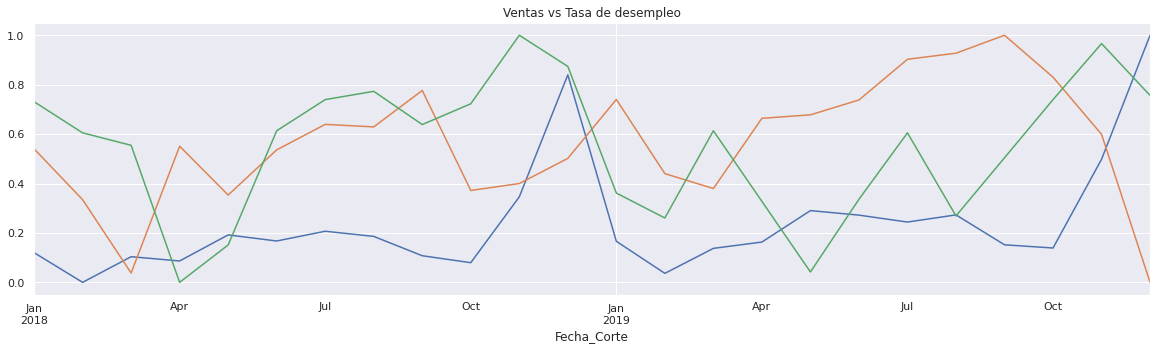

Text(0, 0.5, 'Gasto')

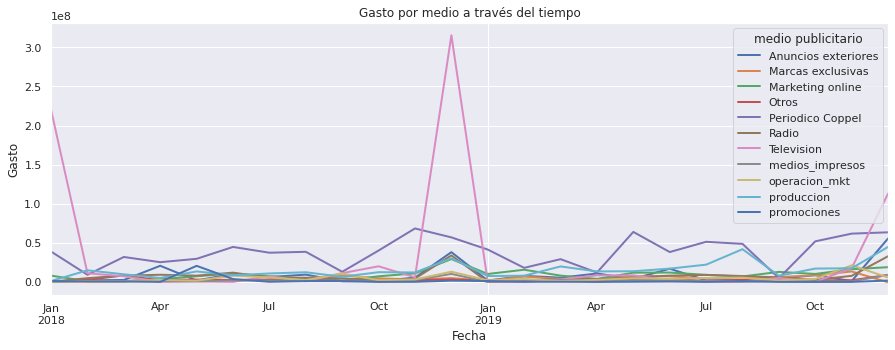

In [ ]:
df_externas_mkt.norm_Venta.plot(figsize=(20,5))
df_externas_mkt.norm_TasaDesempleo.plot(figsize=(20,5))
df_externas_mkt.norm_inflacion.plot(figsize=(20,5))
plt.title("Ventas vs Tasa de desempleo")
plt.show()
fig = Medios_csv.groupby(['Fecha','medio publicitario'])['Gasto'].sum().unstack().plot(
    figsize=(15, 5), linewidth=2)
fig.set_title('Gasto por medio a través del tiempo')
fig.set_ylabel('Gasto')


#Estacionarización de las ventas

In [ ]:
#Veamos si las ventas no son estacionarias
#Prueba de dicky fuller
#Como el p-value es menor que .05 se acepta que sea estacionaria
import statsmodels.tsa.stattools as sts
sts.adfuller(df_externas_mkt.Venta)

(-2.5707405934940932,
 0.0991966273181561,
 1,
 22,
 {'1%': -3.769732625845229,
  '10%': -2.6425009917355373,
  '5%': -3.005425537190083},
 654.7427715662976)

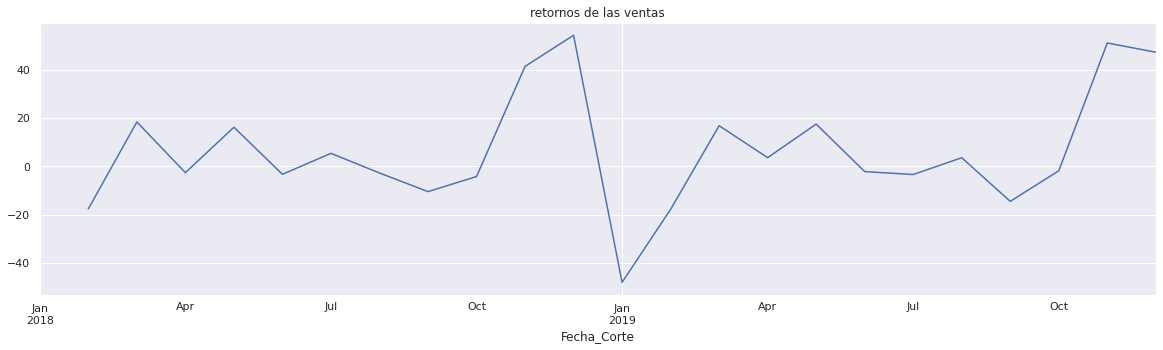

In [ ]:
#Veamos si con una integración es suficiente
df_externas_mkt['returns'] = df_externas_mkt.Venta.pct_change(1)*100

df_externas_mkt.returns.plot(figsize=(20,5))
plt.title("retornos de las ventas")
plt.show()

In [ ]:
#La primero integración sigue sin ser estacionaria
sts.adfuller(df_externas_mkt.returns[1:])

(-2.267637212222775,
 0.18261809396948264,
 9,
 13,
 {'1%': -4.068853732362312,
  '10%': -2.7017297633136095,
  '5%': -3.1271488757396453},
 108.49119704059802)

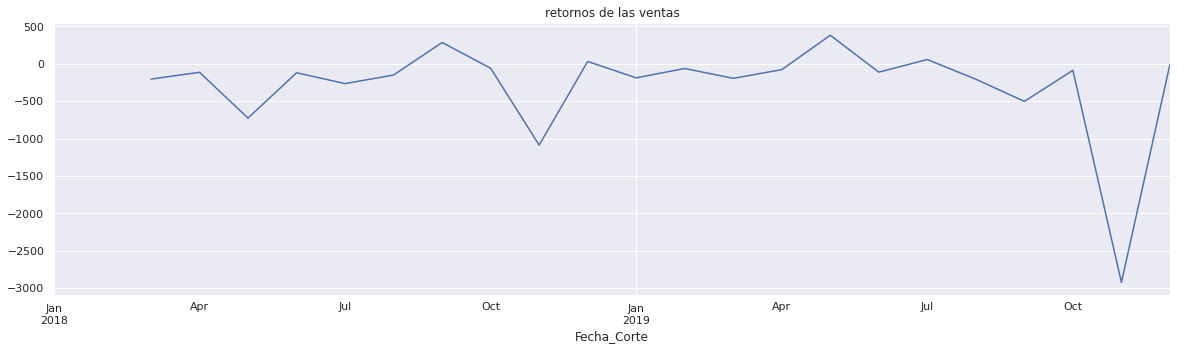

In [ ]:
#Veamos ahora una segunda integración
df_externas_mkt['returns_2'] = df_externas_mkt.returns.pct_change(1)*100

df_externas_mkt.returns_2.plot(figsize=(20,5))
plt.title("retornos de las ventas")
plt.show()

In [ ]:
#En la segunda integración los datos tampoco son estacionarios
sts.adfuller(df_externas_mkt.returns_2[2:])

(-4.977722706609067,
 2.4559984541272483e-05,
 0,
 21,
 {'1%': -3.7883858816542486,
  '10%': -2.6463967573696143,
  '5%': -3.013097747543462},
 198.5329105937644)

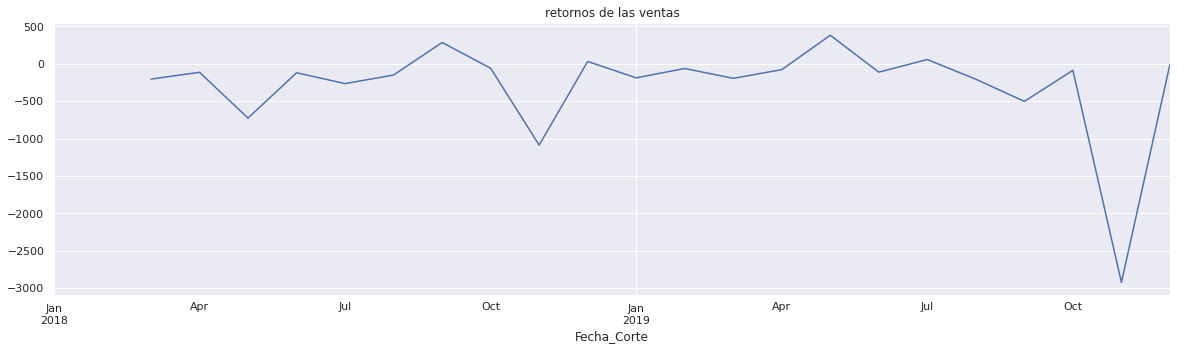

In [ ]:
#Veamos ahora una segunda integración
df_externas_mkt['returns_3'] = df_externas_mkt.returns_2.pct_change(1)*100

df_externas_mkt.returns_2.plot(figsize=(20,5))
plt.title("retornos de las ventas")
plt.show()

In [ ]:
#En la tercera integración ya son estacionarios
sts.adfuller(df_externas_mkt.returns_3[3:])

(-4.619132527207997,
 0.00011907773668568347,
 0,
 20,
 {'1%': -3.8092091249999998, '10%': -2.6507125, '5%': -3.0216450000000004},
 203.3778355520685)

In [ ]:
df_externas_mkt.head().style

,Venta,Anuncios_exteriores,Marcas_exclusivas,Marketing_online,medios_impresos,operacion_mkt,Otros,Periodico_Coppel,produccion,promociones,Radio,Television,Tasa_Desempleo,Inflacion,norm_Venta,norm_TasaDesempleo,norm_inflacion,norm_AnunciosExteriores,norm_MarcasExclusivas,norm_MarketingOnline,norm_MediosImpresos,norm_OperacionMKT,norm_Otros,norm_PeriodicoCoppel,norm_Produccion,norm_Promociones,norm_Radio,norm_Television,returns,returns_2,returns_3
Fecha_Corte,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-31 00:00:00,8524355533,139257,535162,8016888,566,441765,473132,38827409,1196028,1171021,201178,220000000,3.389192,0.530000,0.120188,0.540450,0.731092,0.000000,0.077267,0.251936,0.000000,0.000000,0.000000,0.535150,0.000000,0.056572,0.005381,0.697528,nan,nan,nan
2018-02-28 00:00:00,7025900936,2026434,403225,879590,1207826,1246295,2608239,9151272,14819801,674395,4821474,11069403,3.205057,0.380000,0.000000,0.334572,0.605042,0.034052,0.067779,0.000000,0.117678,0.038763,0.252720,0.068227,0.312356,0.032408,0.141758,0.035096,-17.578509,nan,nan
2018-03-31 00:00:00,8319867864,2458695,687411,1057309,684618,1123035,8470172,31895170,9757559,661153,8086161,7244928,2.939629,0.320000,0.103787,0.037799,0.554622,0.041852,0.088217,0.006273,0.066678,0.032824,0.946564,0.426078,0.196292,0.031763,0.238122,0.022971,18.417096,-204.770525,nan
2018-04-30 00:00:00,8104417918,20650553,3240038,3360935,981647,2530751,1916052,25227800,5042073,99574,9174422,60000,3.398701,-0.340000,0.086506,0.551083,0.000000,0.370104,0.271797,0.087588,0.095631,0.100648,0.170790,0.321174,0.088179,0.004439,0.270244,0.000190,-2.589584,-114.060760,-44.298253
2018-05-31 00:00:00,9419733969,1743612,2520233,7255286,850575,1636500,2942507,29548505,13415805,20560634,8022245,550000,3.221848,-0.160000,0.192005,0.353345,0.151261,0.028949,0.220030,0.225052,0.082855,0.057563,0.292286,0.389156,0.280166,1.000000,0.236235,0.001744,16.229618,-726.726894,537.140145


#Probemos ahora Diferenciando
En este método, calculamos la diferencia de términos consecutivos en la serie. La diferenciación se realiza normalmente para deshacerse de la media variable. Matemáticamente, la diferenciación se puede escribir como:

y t ' = y t - y (t-1)

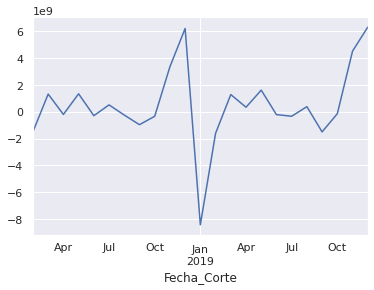

In [ ]:
df_externas_mkt['Ventas_diff'] = df_externas_mkt['Venta'] - df_externas_mkt ['Venta']. shift (1)
df_externas_mkt['Ventas_diff']. dropna (). plot ()

In [ ]:
#La diferenciación parece arrojarnos una serie estacionaria
sts.adfuller(df_externas_mkt.Ventas_diff[1:])

(-3.854717389737215,
 0.002394564518794649,
 1,
 21,
 {'1%': -3.7883858816542486,
  '10%': -2.6463967573696143,
  '5%': -3.013097747543462},
 613.1669732122461)

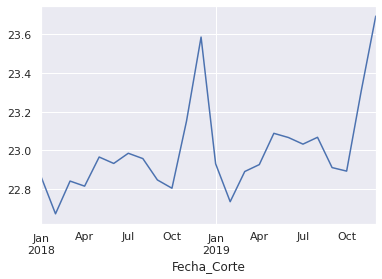

In [ ]:
df_externas_mkt ['Ventas_log'] = np.log (df_externas_mkt ['Venta'])
df_externas_mkt ['Ventas_log'].plot ()


In [ ]:
#El logaritmo de las ventas también es estacional
sts.adfuller(df_externas_mkt.Ventas_log)

(-3.079607864539875,
 0.02809956817980487,
 1,
 22,
 {'1%': -3.769732625845229,
  '10%': -2.6425009917355373,
  '5%': -3.005425537190083},
 0.42419904225142346)

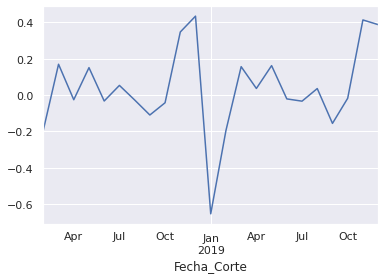

In [ ]:
df_externas_mkt ['Ventas_log_diff'] = df_externas_mkt ['Ventas_log'] - df_externas_mkt ['Ventas_log']. shift (1)
df_externas_mkt ['Ventas_log_diff']. dropna (). plot ()


In [ ]:
#La primero integración sigue sin ser estacionaria
sts.adfuller(df_externas_mkt.Ventas_log_diff[1:])

(-0.9168902457618606,
 0.7823593426608074,
 9,
 13,
 {'1%': -4.068853732362312,
  '10%': -2.7017297633136095,
  '5%': -3.1271488757396453},
 5.219150393097387)

In [ ]:
df_externas_mkt.head()

,Venta,Anuncios_exteriores,Marcas_exclusivas,Marketing_online,medios_impresos,operacion_mkt,Otros,Periodico_Coppel,produccion,promociones,Radio,Television,Tasa_Desempleo,Inflacion,norm_Venta,norm_TasaDesempleo,norm_inflacion,norm_AnunciosExteriores,norm_MarcasExclusivas,norm_MarketingOnline,norm_MediosImpresos,norm_OperacionMKT,norm_Otros,norm_PeriodicoCoppel,norm_Produccion,norm_Promociones,norm_Radio,norm_Television,returns,returns_2,returns_3,Ventas_diff,Ventas_log,Ventas_log_diff
Fecha_Corte,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-31,8524355533,139257,535162,8016888,566,441765,473132,38827409,1196028,1171021,201178,220000000,3.389192,0.53,0.120188,0.540450,0.731092,0.000000,0.077267,0.251936,0.000000,0.000000,0.000000,0.535150,0.000000,0.056572,0.005381,0.697528,NaN,NaN,NaN,NaN,22.866193,NaN
2018-02-28,7025900936,2026434,403225,879590,1207826,1246295,2608239,9151272,14819801,674395,4821474,11069403,3.205057,0.38,0.000000,0.334572,0.605042,0.034052,0.067779,0.000000,0.117678,0.038763,0.252720,0.068227,0.312356,0.032408,0.141758,0.035096,-17.578509,NaN,NaN,-1.498455e+09,22.672869,-0.193324
2018-03-31,8319867864,2458695,687411,1057309,684618,1123035,8470172,31895170,9757559,661153,8086161,7244928,2.939629,0.32,0.103787,0.037799,0.554622,0.041852,0.088217,0.006273,0.066678,0.032824,0.946564,0.426078,0.196292,0.031763,0.238122,0.022971,18.417096,-204.770525,NaN,1.293967e+09,22.841912,0.169043
2018-04-30,8104417918,20650553,3240038,3360935,981647,2530751,1916052,25227800,5042073,99574,9174422,60000,3.398701,-0.34,0.086506,0.551083,0.000000,0.370104,0.271797,0.087588,0.095631,0.100648,0.170790,0.321174,0.088179,0.004439,0.270244,0.000190,-2.589584,-114.060760,-44.298253,-2.154499e+08,22.815675,-0.026237
2018-05-31,9419733969,1743612,2520233,7255286,850575,1636500,2942507,29548505,13415805,20560634,8022245,550000,3.221848,-0.16,0.192005,0.353345,0.151261,0.028949,0.220030,0.225052,0.082855,0.057563,0.292286,0.389156,0.280166,1.000000,0.236235,0.001744,16.229618,-726.726894,537.140145,1.315316e+09,22.966073,0.150398


In [ ]:
size = int(len(df_externas_mkt)*0.8)
df, df_test = df_externas_mkt.iloc[:size], df_externas_mkt.iloc[size:]

# Ajuste de la serie de tiempo sin transformaciones

In [ ]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import AR,ARResults
import warnings
warnings.filterwarnings("ignore")

#AR

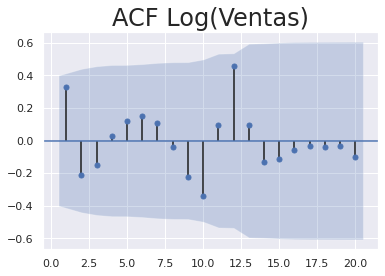

In [ ]:
#Analizamos el gráfico de autocorrelación
#Indicamos que no considere la primera y segunda fila dado que no hay tasa de variación entre los periodos
#Y que lo haga para 20 retrasos
#Observamos que no todos los retrasos son positivos a diferencia de con los precios, además de que varian mucho en magnitud
#Los primeros retornos son los más significativos
sgt.plot_acf(df_externas_mkt.Ventas_log, zero = False, lags = 20)
plt.title("ACF Log(Ventas)", size=24)
plt.show()

#La mayoría de los coeficientes son negativos esto a punta a que los datos del pasado son muy relevantes para lo que pase en el siguiente periodo

#MA



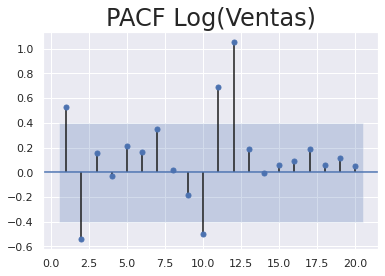

In [ ]:
#Gráfico de autocorrelación parcial
#Método por verosimilitud
#Observamos que es muy parecida al gráfico de autocorrelación
#Lo más recomendable será explorar más o menos 7 retrasos después de ese punto ya no serán de mucha ayuda los retrasos
sgt.plot_pacf(df_externas_mkt.Ventas_log, lags = 20, zero = False, method = ('ols'))
plt.title("PACF Log(Ventas)", size=24)
plt.show()

# La intuición dicta que cuanto más retrocedemos más relevantes serán los coeficientes

#AR

In [ ]:
#Definimos la función para el contraste de log verosimilitudes de los modelos que generaremos

def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
#Modelo AR(2)
model_log_ar_2 = ARMA(df_externas_mkt.Ventas_log, order=(2,0))
results_log_ar_2 = model_log_ar_2.fit()
print(results_log_ar_2.summary())
#El primer,segundo  y tercer retrasos si es significativo


                              ARMA Model Results                              
Dep. Variable:             Ventas_log   No. Observations:                   24
Model:                     ARMA(2, 0)   Log Likelihood                   5.410
Method:                       css-mle   S.D. of innovations              0.190
Date:                Tue, 15 Sep 2020   AIC                             -2.820
Time:                        17:26:33   BIC                              1.893
Sample:                    01-31-2018   HQIC                            -1.569
                         - 12-31-2019                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               23.0016      0.044    525.180      0.000      22.916      23.087
ar.L1.Ventas_log     0.6276      0.213      2.947      0.003       0.210       1.045
ar.L2.Ventas_log    -0.5450 

In [ ]:
#Modelo ARMA(1,1)
#model_ret_ar_1_ma_1 = ARMA(df_externas_mkt.Ventas_log, order=(2,3))
#Ajustamos el modelo
#results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
#Resumen del modelo, en este caso os 2 coeficientes son significativos
#results_ret_ar_1_ma_1.summary()



In [ ]:
#Contraste de log verosimilitudes es significante, por lo cuál nos quedamos con el modelo más complejo
#print("\nLLR test p-value = " + str(LLR_test( results_ret_ar_1_ma_1,results_ret_ma_3)))


#AutoArima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
#Auto arima con diferencia de ventas
model_auto = auto_arima(df_externas_mkt.Ventas_diff[1:])
model_auto

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=False)

In [ ]:
#Auto arima con logaritmo de las ventas
#Generamos un modelo según lo recomendado por "auto arima"
model_auto = auto_arima(df_externas_mkt.Ventas_log)
#Coincide con lo que salió
model_auto

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [ ]:
#Mayor VEROSIMILITUD y menor AIC "ARIMA(1,1,1)"
#print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ",results_ar_1_i_1_ma_1.aic)
#print("ARIMA(2,2,2):  \t LL = ", results_ar_2_i_2_ma_2.llf, "\t AIC = ", results_ar_2_i_2_ma_2.aic)

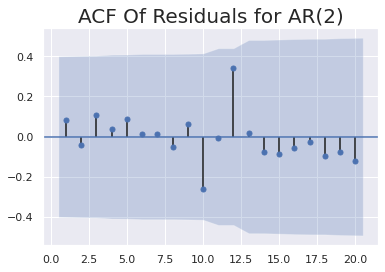

In [ ]:
df_externas_mkt['res_log_ar_2'] = results_log_ar_2.resid
sgt.plot_acf(df_externas_mkt.res_log_ar_2, zero = False, lags = 20)
#Observamos que no hay retrasos significativos
plt.title("ACF Of Residuals for AR(2)", size=20)
plt.show()

#**Predicciones**

In [ ]:
start_date =df_Ventas.index[0]
end_date =df_Ventas.index[23]

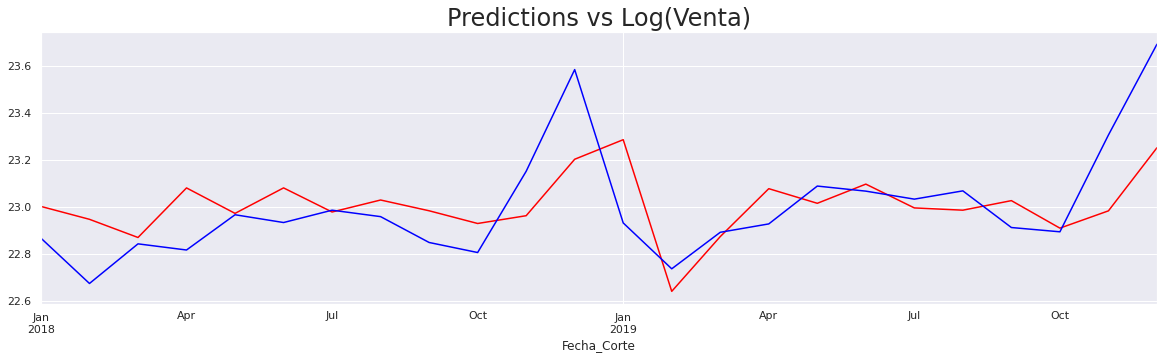

RMSE: 0.0403995241183328


In [ ]:
model_log_ar_2 = ARMA(df_externas_mkt.Ventas_log, order=(2,0))
results_log_ar_2 = model_log_ar_2.fit()

df_pred_log_ar_2 = results_log_ar_2.predict(start = start_date, end = end_date) 
df_pred_log_ar_2[start_date:end_date].plot(figsize = (20,5), color = "red")   
df_externas_mkt.Ventas_log[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Log(Venta)", size = 24)
plt.show()

import math
print('RMSE:',
      math.sqrt((np.sum(df_pred_log_ar_2[start_date:end_date]-df_externas_mkt.Ventas_log[start_date:end_date]))**2/24))


In [ ]:
df_externas_mkt.columns

Index(['Venta', 'Anuncios_exteriores', 'Marcas_exclusivas', 'Marketing_online',
       'medios_impresos', 'operacion_mkt', 'Otros', 'Periodico_Coppel',
       'produccion', 'promociones', 'Radio', 'Television', 'Tasa_Desempleo',
       'Inflacion', 'norm_Venta', 'norm_TasaDesempleo', 'norm_inflacion',
       'norm_AnunciosExteriores', 'norm_MarcasExclusivas',
       'norm_MarketingOnline', 'norm_MediosImpresos', 'norm_OperacionMKT',
       'norm_Otros', 'norm_PeriodicoCoppel', 'norm_Produccion',
       'norm_Promociones', 'norm_Radio', 'norm_Television', 'returns',
       'returns_2', 'returns_3', 'Ventas_diff', 'Ventas_log',
       'Ventas_log_diff', 'res_log_ar_2'],
      dtype='object')

# AR(2) sin gastos

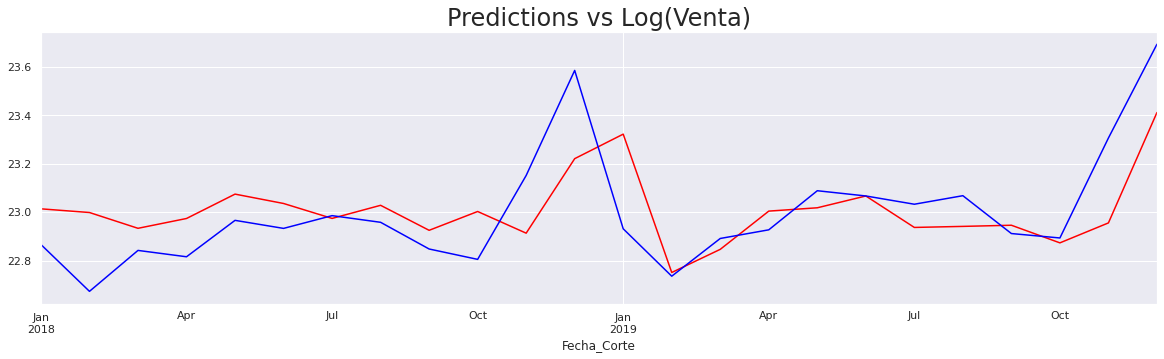

RMSE: 0.039094986937864694


In [ ]:
model_log_ar_2 = ARMA(df_externas_mkt.Ventas_log,exog = df_externas_mkt[['norm_TasaDesempleo']] ,order=(2,0))
results_log_ar_2 = model_log_ar_2.fit()


df_pred_log_ar_2 = results_log_ar_2.predict(start = start_date, end = end_date) 
df_pred_log_ar_2[start_date:end_date].plot(figsize = (20,5), color = "red")   
df_externas_mkt.Ventas_log[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Log(Venta)", size = 24)
plt.show()

import math
print('RMSE:',
      math.sqrt((np.sum(df_pred_log_ar_2[start_date:end_date]-df_externas_mkt.Ventas_log[start_date:end_date]))**2/24))


In [ ]:
df_externas_mkt.Venta-np.exp(df_pred_log_ar_2)

Fecha_Corte
2018-01-31   -1.354229e+09
2018-02-28   -2.703624e+09
2018-03-31   -7.953739e+08
2018-04-30   -1.388115e+09
2018-05-31   -1.077956e+09
2018-06-30   -9.874250e+08
2018-07-31    1.090279e+08
2018-08-31   -6.792769e+08
2018-09-30   -6.714664e+08
2018-10-31   -1.752909e+09
2018-11-30    2.404231e+09
2018-12-31    5.342688e+09
2019-01-31   -4.351525e+09
2019-02-28   -1.151810e+08
2019-03-31    3.835528e+08
2019-04-30   -7.277939e+08
2019-05-31    7.241029e+08
2019-06-30    7.534592e+05
2019-07-31    9.201347e+08
2019-08-31    1.242151e+09
2019-09-30   -3.113448e+08
2019-10-31    1.753027e+08
2019-11-30    3.915156e+09
2019-12-31    4.789373e+09
dtype: float64

#AR(2) CON GASTOS

In [ ]:
#AR(2) con exogenas
model_log_ar_2_Xspx = ARIMA(df_externas_mkt.Ventas_log,exog = df_externas_mkt[['norm_AnunciosExteriores', 'norm_MarcasExclusivas',
                                                                               'norm_MarketingOnline', 'norm_MediosImpresos', 'norm_OperacionMKT',
                                                                               'norm_Otros', 'norm_PeriodicoCoppel', 'norm_Produccion','norm_Promociones', 
                                                                               'norm_Radio', 'norm_Television', 'norm_TasaDesempleo']],  order=(2,0,0))
results_log_ar_2_Xspx = model_log_ar_2_Xspx.fit()
results_log_ar_2_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Ventas_log   No. Observations:                   24
Model:                     ARMA(2, 0)   Log Likelihood                  49.214
Method:                       css-mle   S.D. of innovations              0.029
Date:                Tue, 15 Sep 2020   AIC                            -66.427
Time:                        17:27:07   BIC                            -47.579
Sample:                    01-31-2018   HQIC                           -61.427
                         - 12-31-2019                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      22.4055      0.035    639.976      0.000      22.337      22.474
norm_AnunciosExteriores     0.6336      0.094      6.728      0.000       0.449       0.818
norm_MarcasExclusivas      -0.0208      0.042     -0.500      0.617      -0.102       0.061
norm_MarketingOnline       -0.1072      0.032     -3.370      0.001      -0.169      -0.045
norm_MediosImpresos         0.5595      0.104      5.387      0.000       0.356       0.763
norm_OperacionMKT           0.2236      0.041      5.415      0.000       0.143       0.305
norm_Otros                  0.2891      0.077      3.734      0.000       0.137       0.441
norm_PeriodicoCoppel        0.3323      0.025     13.354      0.000       0.284       0.381
norm_Produccion             0.3976      0.043      9.181      0.000       0.313       0.482
norm_Promociones            0.2807      0.056      5.021      0.000       0.171       0.390
norm_Radio                 -0.7593      0.171     -4.432      0.000      -1.095      -0.423
norm_Television             0.2224      0.046      4.828      0.000       0.132       0.313
norm_TasaDesempleo          0.2458      0.037      6.601      0.000       0.173       0.319
ar.L1.Ventas_log           -1.5244      0.155     -9.811      0.000      -1.829      -1.220
ar.L2.Ventas_log           -0.6746      0.176     -3.824      0.000      -1.020      -0.329
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1299           -0.4537j            1.2175           -0.4392
AR.2           -1.1299           +0.4537j            1.2175            0.4392
-----------------------------------------------------------------------------
"""

In [ ]:
start_date =df_Ventas.index[0]
end_date =df_Ventas.index[23]

In [ ]:
print(df_Ventas.index[0])
print(df_Ventas.index[23])

2018-01-31 00:00:00
2019-12-31 00:00:00


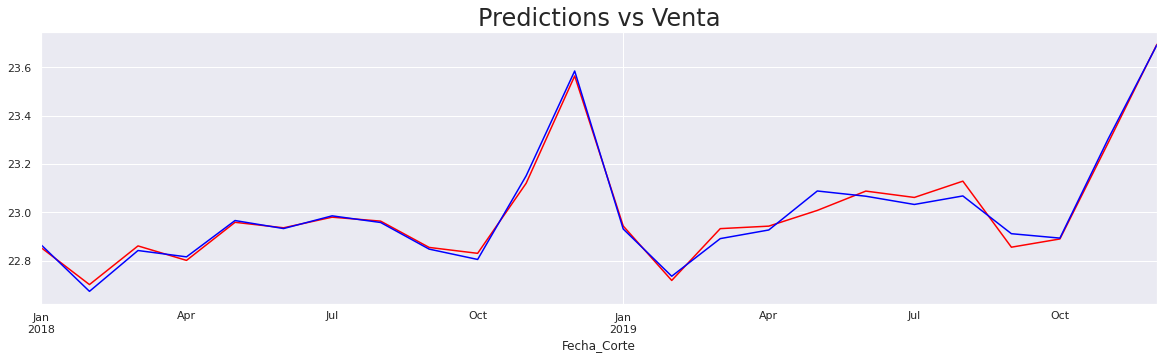

RMSE: 0.0015321844628821842


In [ ]:
df_pred_log_ar_2_Xspx = results_log_ar_2_Xspx.predict(start = start_date, end = end_date, 
                                          exog = df_externas_mkt[['norm_AnunciosExteriores', 'norm_MarcasExclusivas',
                                                                               'norm_MarketingOnline', 'norm_MediosImpresos', 'norm_OperacionMKT',
                                                                               'norm_Otros', 'norm_PeriodicoCoppel', 'norm_Produccion','norm_Promociones', 
                                                                               'norm_Radio', 'norm_Television', 'norm_TasaDesempleo']][start_date:end_date]) 
df_pred_log_ar_2_Xspx[start_date:end_date].plot(figsize = (20,5), color = "red")   
df_externas_mkt.Ventas_log[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Venta", size = 24)
plt.show()

import math
print('RMSE:',
      math.sqrt((np.sum(df_pred_log_ar_2_Xspx[start_date:end_date]-df_externas_mkt.Ventas_log[start_date:end_date]))**2/24))


In [ ]:
results_log_ar_2_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Ventas_log   No. Observations:                   24
Model:                     ARMA(2, 0)   Log Likelihood                  49.214
Method:                       css-mle   S.D. of innovations              0.029
Date:                Tue, 15 Sep 2020   AIC                            -66.427
Time:                        17:27:13   BIC                            -47.579
Sample:                    01-31-2018   HQIC                           -61.427
                         - 12-31-2019                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      22.4055      0.035    639.976      0.000      22.337      22.474
norm_AnunciosExteriores     0.6336      0.094      6.728      0.000       0.449       0.818
norm_MarcasExclusivas      -0.0208      0.042     -0.500      0.617      -0.102       0.061
norm_MarketingOnline       -0.1072      0.032     -3.370      0.001      -0.169      -0.045
norm_MediosImpresos         0.5595      0.104      5.387      0.000       0.356       0.763
norm_OperacionMKT           0.2236      0.041      5.415      0.000       0.143       0.305
norm_Otros                  0.2891      0.077      3.734      0.000       0.137       0.441
norm_PeriodicoCoppel        0.3323      0.025     13.354      0.000       0.284       0.381
norm_Produccion             0.3976      0.043      9.181      0.000       0.313       0.482
norm_Promociones            0.2807      0.056      5.021      0.000       0.171       0.390
norm_Radio                 -0.7593      0.171     -4.432      0.000      -1.095      -0.423
norm_Television             0.2224      0.046      4.828      0.000       0.132       0.313
norm_TasaDesempleo          0.2458      0.037      6.601      0.000       0.173       0.319
ar.L1.Ventas_log           -1.5244      0.155     -9.811      0.000      -1.829      -1.220
ar.L2.Ventas_log           -0.6746      0.176     -3.824      0.000      -1.020      -0.329
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1299           -0.4537j            1.2175           -0.4392
AR.2           -1.1299           +0.4537j            1.2175            0.4392
-----------------------------------------------------------------------------
"""

In [ ]:
df_pred_log_ar_2_Xspx

2018-01-31    22.854451
2018-02-28    22.700896
2018-03-31    22.861009
2018-04-30    22.801023
2018-05-31    22.958744
2018-06-30    22.935972
2018-07-31    22.979991
2018-08-31    22.963677
2018-09-30    22.854739
2018-10-31    22.830278
2018-11-30    23.120483
2018-12-31    23.564743
2019-01-31    22.943453
2019-02-28    22.718009
2019-03-31    22.932551
2019-04-30    22.942863
2019-05-31    23.007977
2019-06-30    23.088016
2019-07-31    23.061690
2019-08-31    23.129103
2019-09-30    22.855700
2019-10-31    22.889775
2019-11-30    23.289871
2019-12-31    23.696014
Freq: M, dtype: float64

In [ ]:
results_log_ar_2_Xspx.params

const                      22.405468
norm_AnunciosExteriores     0.633595
norm_MarcasExclusivas      -0.020768
norm_MarketingOnline       -0.107156
norm_MediosImpresos         0.559534
norm_OperacionMKT           0.223596
norm_Otros                  0.289092
norm_PeriodicoCoppel        0.332283
norm_Produccion             0.397577
norm_Promociones            0.280678
norm_Radio                 -0.759253
norm_Television             0.222364
norm_TasaDesempleo          0.245842
ar.L1.Ventas_log           -1.524363
ar.L2.Ventas_log           -0.674580
dtype: float64

In [ ]:
results_log_ar_2_Xspx.resid 

Fecha_Corte
2018-01-31    0.011742
2018-02-28   -0.028026
2018-03-31   -0.019097
2018-04-30    0.014652
2018-05-31    0.007329
2018-06-30   -0.003113
2018-07-31    0.005507
2018-08-31   -0.005663
2018-09-30   -0.006981
2018-10-31   -0.025346
2018-11-30    0.030966
2018-12-31    0.020496
2019-01-31   -0.012280
2019-02-28    0.017456
2019-03-31   -0.041318
2019-04-30   -0.015896
2019-05-31    0.080438
2019-06-30   -0.021239
2019-07-31   -0.029042
2019-08-31   -0.061171
2019-09-30    0.055875
2019-10-31    0.003535
2019-11-30    0.016337
2019-12-31   -0.002669
dtype: float64

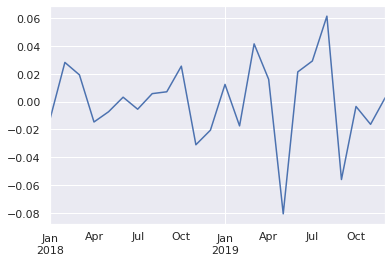

In [ ]:
x=df_pred_log_ar_2_Xspx-df_externas_mkt.Ventas_log
x.plot()
plt.show()

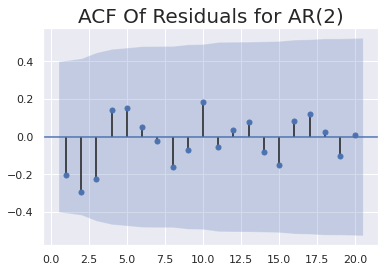

In [ ]:
df_externas_mkt['res_log_ar_2'] = results_log_ar_2_Xspx.resid
sgt.plot_acf(df_externas_mkt.res_log_ar_2, zero = False, lags = 20)
#Observamos que no hay retrasos significativos
plt.title("ACF Of Residuals for AR(2)", size=20)
plt.show()

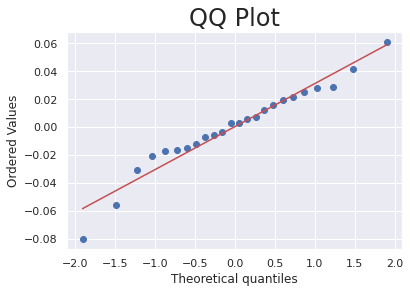

In [ ]:
import scipy.stats
scipy.stats.probplot(x, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

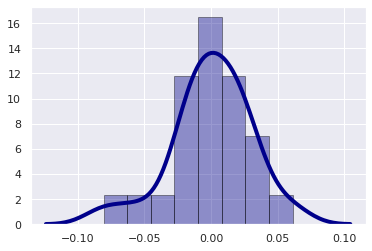

In [ ]:
sns.distplot(x, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
evaluacion=pd.concat([np.exp(df_pred_log_ar_2_Xspx), df_externas_mkt], axis=1)
evaluacion.head()

,0,Venta,Anuncios_exteriores,Marcas_exclusivas,Marketing_online,medios_impresos,operacion_mkt,Otros,Periodico_Coppel,produccion,promociones,Radio,Television,Tasa_Desempleo,Inflacion,norm_Venta,norm_TasaDesempleo,norm_inflacion,norm_AnunciosExteriores,norm_MarcasExclusivas,norm_MarketingOnline,norm_MediosImpresos,norm_OperacionMKT,norm_Otros,norm_PeriodicoCoppel,norm_Produccion,norm_Promociones,norm_Radio,norm_Television,returns,returns_2,returns_3,Ventas_diff,Ventas_log,Ventas_log_diff,res_log_ar_2
2018-01-31,8.424844e+09,8524355533,139257,535162,8016888,566,441765,473132,38827409,1196028,1171021,201178,220000000,3.389192,0.53,0.120188,0.540450,0.731092,0.000000,0.077267,0.251936,0.000000,0.000000,0.000000,0.535150,0.000000,0.056572,0.005381,0.697528,NaN,NaN,NaN,NaN,22.866193,NaN,0.011742
2018-02-28,7.225597e+09,7025900936,2026434,403225,879590,1207826,1246295,2608239,9151272,14819801,674395,4821474,11069403,3.205057,0.38,0.000000,0.334572,0.605042,0.034052,0.067779,0.000000,0.117678,0.038763,0.252720,0.068227,0.312356,0.032408,0.141758,0.035096,-17.578509,NaN,NaN,-1.498455e+09,22.672869,-0.193324,-0.028026
2018-03-31,8.480277e+09,8319867864,2458695,687411,1057309,684618,1123035,8470172,31895170,9757559,661153,8086161,7244928,2.939629,0.32,0.103787,0.037799,0.554622,0.041852,0.088217,0.006273,0.066678,0.032824,0.946564,0.426078,0.196292,0.031763,0.238122,0.022971,18.417096,-204.770525,NaN,1.293967e+09,22.841912,0.169043,-0.019097
2018-04-30,7.986539e+09,8104417918,20650553,3240038,3360935,981647,2530751,1916052,25227800,5042073,99574,9174422,60000,3.398701,-0.34,0.086506,0.551083,0.000000,0.370104,0.271797,0.087588,0.095631,0.100648,0.170790,0.321174,0.088179,0.004439,0.270244,0.000190,-2.589584,-114.060760,-44.298253,-2.154499e+08,22.815675,-0.026237,0.014652
2018-05-31,9.350948e+09,9419733969,1743612,2520233,7255286,850575,1636500,2942507,29548505,13415805,20560634,8022245,550000,3.221848,-0.16,0.192005,0.353345,0.151261,0.028949,0.220030,0.225052,0.082855,0.057563,0.292286,0.389156,0.280166,1.000000,0.236235,0.001744,16.229618,-726.726894,537.140145,1.315316e+09,22.966073,0.150398,0.007329


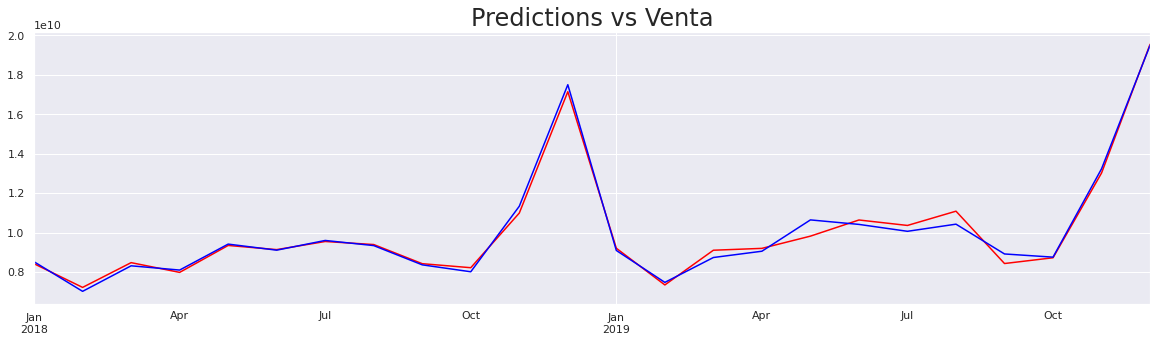

In [ ]:
evaluacion = evaluacion.rename(columns={0:'exp_predict'})
evaluacion.columns

evaluacion.exp_predict[start_date:end_date].plot(figsize = (20,5), color = "red")   
evaluacion.Venta[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Venta", size = 24)
plt.show()

## **Modelo Autorregresivo AR**

A menudo encontramos similitudes entre valores pasados y valores presentes, esto se debe a que encontramos correlación entre dichos datos. La autocorrelación describe la relación de la variables consigo misma, esto nos va a permitir definir **un modelo AR que se basa solamente en valores de periodos pasados para predecir valores de periodos actuales**

Es un modelo lineal de la forma $x_{t}=c+\phi_{1} x_{t-1}+\epsilon_{t}$ es la suma de periodos pasados multiplicados por un coeficiente.

donde:

$c:$ es una constante.

$x_{t}:$ es el periodo actual.

$x_{t-1}:$ es un periodo anterior.

$\phi:$ es un coeficiente a estimar, donde $-1<\phi\leq 1$. 

$\epsilon_{t}:$ son los residuos, no es más que la diferencia entre la predicción para el periodo $t$ y el valor correcto . 

En el caso en el que nuestro problema sea descrito por un modelo **AR** de la forma $x_{t}=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\beta_{3}x_{3}+...+\beta_{n}x_{n}+\phi_{1} x_{t-1}+\phi_{2} x_{t-2}+\epsilon_{t}$ este es un modelo **AR(2)** en donde el orden del modelo indica el número de retrasos considerados para el modelo.

**¿Como le quitamos el efecto de medios al proceso?**

Consideremos que la serie de tiempo se modelo como el logaritmo de las ventas, por lo cuál se vería de la siguiente forma:

$ln(x_{t})=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\beta_{3}x_{3}+...+\beta_{n}x_{n}+\phi_{1} x_{t-1}+\phi_{2} x_{t-2}+\epsilon_{t}$

$\Rightarrow$ $x_{t}= \exp{(\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\beta_{3}x_{3}+...+\beta_{n}x_{n}+\phi_{1} x_{t-1}+\phi_{2} x_{t-2}+\epsilon_{t})}$

$\Rightarrow$ $\exp{(\beta_{0})}$ $\cdot$ $\exp{(\beta_{1} x_{1})}$ $\cdot$ $\exp{(\beta_{2} x_{2})}$ $\cdot$ ...$\cdot$ $\exp{(\beta_{n} x_{n})}$ $\cdot$ $\phi_{1} x_{t-1}$ $\cdot$ $\phi_{1} x_{t-2}$ $\cdot$ $\epsilon_{t}$

Para poder aislar el modelo de los efectos de medios de marketing haremos cero sus coeficientes y modelaremos con las variables externas.


In [ ]:
Informacion_MKT_CEROS_csv = pd.read_csv("/content/drive/My Drive/datasets/Información_mkt_ceros.csv")
#Copiamos la información en otra variable
df_Informacion_MKT_CEROS=Informacion_MKT_CEROS_csv.copy()

In [ ]:
df_Informacion_MKT_CEROS['Fecha_Corte'] = pd.to_datetime(df_Informacion_MKT_CEROS.Fecha_Corte, dayfirst = True)
df_Informacion_MKT_CEROS.set_index("Fecha_Corte", inplace=True)
df_Informacion_MKT_CEROS['Ventas_log'] = np.log (df_Informacion_MKT_CEROS ['Venta'])
df_Informacion_MKT_CEROS['norm_TasaDesempleo'] = min_max_scaler.fit_transform(df_Informacion_MKT_CEROS['Tasa_Desempleo'].values.reshape(-1,1))

df_Informacion_MKT_CEROS['norm_AnunciosExteriores'] = min_max_scaler.fit_transform(df_Informacion_MKT_CEROS['Anuncios_exteriores'].values.reshape(-1,1))
df_Informacion_MKT_CEROS['norm_MarcasExclusivas'] = min_max_scaler.fit_transform(df_Informacion_MKT_CEROS['Marcas_exclusivas'].values.reshape(-1,1))
df_Informacion_MKT_CEROS['norm_MarketingOnline'] = min_max_scaler.fit_transform(df_Informacion_MKT_CEROS['Marketing_online'].values.reshape(-1,1))
df_Informacion_MKT_CEROS['norm_MediosImpresos'] = min_max_scaler.fit_transform(df_Informacion_MKT_CEROS['medios_impresos'].values.reshape(-1,1))
df_Informacion_MKT_CEROS['norm_OperacionMKT'] = min_max_scaler.fit_transform(df_Informacion_MKT_CEROS['operacion_mkt'].values.reshape(-1,1))
df_Informacion_MKT_CEROS['norm_Otros'] = min_max_scaler.fit_transform(df_Informacion_MKT_CEROS['Otros'].values.reshape(-1,1))
df_Informacion_MKT_CEROS['norm_PeriodicoCoppel'] = min_max_scaler.fit_transform(df_Informacion_MKT_CEROS['Periodico_Coppel'].values.reshape(-1,1))
df_Informacion_MKT_CEROS['norm_Produccion'] = min_max_scaler.fit_transform(df_Informacion_MKT_CEROS['produccion'].values.reshape(-1,1))
df_Informacion_MKT_CEROS['norm_Promociones'] = min_max_scaler.fit_transform(df_Informacion_MKT_CEROS['promociones'].values.reshape(-1,1))
df_Informacion_MKT_CEROS['norm_Radio'] = min_max_scaler.fit_transform(df_Informacion_MKT_CEROS['Radio'].values.reshape(-1,1))
df_Informacion_MKT_CEROS['norm_Television'] = min_max_scaler.fit_transform(df_Informacion_MKT_CEROS['Television'].values.reshape(-1,1))

df_Informacion_MKT_CEROS.head()

,Venta,Anuncios_exteriores,Marcas_exclusivas,Marketing_online,medios_impresos,operacion_mkt,Otros,Periodico_Coppel,produccion,promociones,Radio,Television,Tasa_Desempleo,Ventas_log,norm_TasaDesempleo,norm_AnunciosExteriores,norm_MarcasExclusivas,norm_MarketingOnline,norm_MediosImpresos,norm_OperacionMKT,norm_Otros,norm_PeriodicoCoppel,norm_Produccion,norm_Promociones,norm_Radio,norm_Television
Fecha_Corte,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-31,8524355533,0,0,0,0,0,0,0,0,0,0,0,3.389192,22.866193,0.540450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-28,7025900936,0,0,0,0,0,0,0,0,0,0,0,3.205057,22.672869,0.334572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-31,8319867864,0,0,0,0,0,0,0,0,0,0,0,2.939629,22.841912,0.037799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-04-30,8104417918,0,0,0,0,0,0,0,0,0,0,0,3.398701,22.815675,0.551083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-31,9419733969,0,0,0,0,0,0,0,0,0,0,0,3.221848,22.966073,0.353345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Set 
model_log_ar_2_Xspx = ARIMA(df.Ventas_log,exog = df[['norm_AnunciosExteriores', 'norm_MarcasExclusivas',
                                                                               'norm_MarketingOnline', 'norm_MediosImpresos', 'norm_OperacionMKT',
                                                                               'norm_Otros', 'norm_PeriodicoCoppel', 'norm_Produccion','norm_Promociones', 
                                                                               'norm_Radio', 'norm_Television', 'norm_TasaDesempleo']],  order=(2,0,0))
results_log_ar_2_Xspx = model_log_ar_2_Xspx.fit()


In [ ]:
# Le damos el intervalo de tiempo para el forecast
start_date = '2018-01-31 00:00:00'
end_date = '2019-12-31 00:00:00'

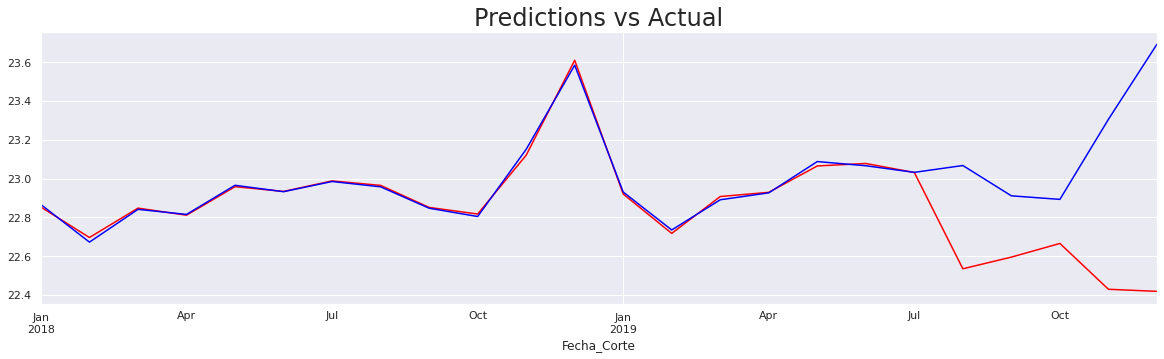

In [ ]:
df_pred_sarimax = results_log_ar_2_Xspx.predict(start = start_date, end = end_date, 
                                              exog = df_Informacion_MKT_CEROS[['norm_AnunciosExteriores', 'norm_MarcasExclusivas',
                                                                               'norm_MarketingOnline', 'norm_MediosImpresos', 'norm_OperacionMKT',
                                                                               'norm_Otros', 'norm_PeriodicoCoppel', 'norm_Produccion','norm_Promociones', 
                                                                               'norm_Radio', 'norm_Television', 'norm_TasaDesempleo']][start_date:end_date]) 

df_pred_sarimax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_externas_mkt.Ventas_log[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

In [ ]:
results_log_ar_2_Xspx.params

const                      22.382936
norm_AnunciosExteriores     0.794757
norm_MarcasExclusivas      -0.056530
norm_MarketingOnline       -0.157927
norm_MediosImpresos         0.615188
norm_OperacionMKT           0.297331
norm_Otros                  0.341240
norm_PeriodicoCoppel        0.374049
norm_Produccion             0.482010
norm_Promociones            0.339551
norm_Radio                 -1.026226
norm_Television             0.249900
norm_TasaDesempleo          0.234101
ar.L1.Ventas_log           -1.282629
ar.L2.Ventas_log           -0.945612
dtype: float64

In [ ]:
df_pred_sarimax

2018-01-31    22.853472
2018-02-28    22.696641
2018-03-31    22.848220
2018-04-30    22.811814
2018-05-31    22.958741
2018-06-30    22.934287
2018-07-31    22.988667
2018-08-31    22.965444
2018-09-30    22.851936
2018-10-31    22.817626
2018-11-30    23.120980
2018-12-31    23.610876
2019-01-31    22.920896
2019-02-28    22.717884
2019-03-31    22.908040
2019-04-30    22.929641
2019-05-31    23.065692
2019-06-30    23.078374
2019-07-31    23.031913
2019-08-31    22.535322
2019-09-30    22.595602
2019-10-31    22.666039
2019-11-30    22.429676
2019-12-31    22.418984
Freq: M, dtype: float64

# ARMA(1,1,1) CON EXOGENAS

In [ ]:
df_externas_mkt.columns

Index(['Venta', 'Anuncios_exteriores', 'Marcas_exclusivas', 'Marketing_online',
       'medios_impresos', 'operacion_mkt', 'Otros', 'Periodico_Coppel',
       'produccion', 'promociones', 'Radio', 'Television', 'Tasa_Desempleo',
       'norm_Venta', 'norm_TasaDesempleo', 'returns', 'returns_2', 'returns_3',
       'Ventas_diff', 'Ventas_log', 'Ventas_log_diff', 'res_log_ar_2'],
      dtype='object')

In [ ]:
#ARMA(1,1,1) con exogenas
model_log_ar_2_Xspx = ARIMA(df_externas_mkt.Ventas_log,exog = df_externas_mkt[['Anuncios_exteriores', 'Marcas_exclusivas',
                                                                               'Marketing_online','medios_impresos', 'operacion_mkt',
                                                                               'Otros', 'Periodico_Coppel','produccion', 'promociones',
                                                                               'Radio', 'Television', 'Tasa_Desempleo']],  order=(1,1,0))
results_log_ar_2_Xspx = model_log_ar_2_Xspx.fit()
results_log_ar_2_Xspx.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Ventas_log   No. Observations:                   23
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  15.452
Method:                       css-mle   S.D. of innovations              0.124
Date:                Fri, 04 Sep 2020   AIC                             -0.905
Time:                        17:41:04   BIC                             16.128
Sample:                    02-28-2018   HQIC                             3.379
                         - 12-31-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.3751      0.294      4.672      0.000       0.798       1.952
Anuncios_exteriores  -8.25e-09    6.5e-08     -0.127      0.899   -1.36e-07    1.19e-07
Marcas_exclusivas    5.121e-08    8.2e-08      0.625      0.532   -1.09e-07    2.12e-07
Marketing_online    -1.274e-08   1.43e-07     -0.089      0.929   -2.94e-07    2.68e-07
medios_impresos      3.454e-08   1.02e-07      0.338      0.735   -1.66e-07    2.35e-07
operacion_mkt       -1.002e-08   1.66e-08     -0.604      0.546   -4.26e-08    2.25e-08
Otros               -1.164e-08        nan        nan        nan         nan         nan
Periodico_Coppel     4.035e-09        nan        nan        nan         nan         nan
produccion           7.653e-10        nan        nan        nan         nan         nan
promociones          1.079e-09   7.09e-08      0.015      0.988   -1.38e-07     1.4e-07
Radio                2.856e-08   1.33e-07      0.215      0.830   -2.31e-07    2.89e-07
Television           -7.22e-10   1.43e-07     -0.005      0.996   -2.81e-07     2.8e-07
Tasa_Desempleo         -0.5103      0.086     -5.928      0.000      -0.679      -0.342
ar.L1.D.Ventas_log      0.0387      0.209      0.185      0.853      -0.371       0.449
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           25.8125           +0.0000j           25.8125            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
start_date =df_Ventas.index[1]
end_date =df_Ventas.index[23]

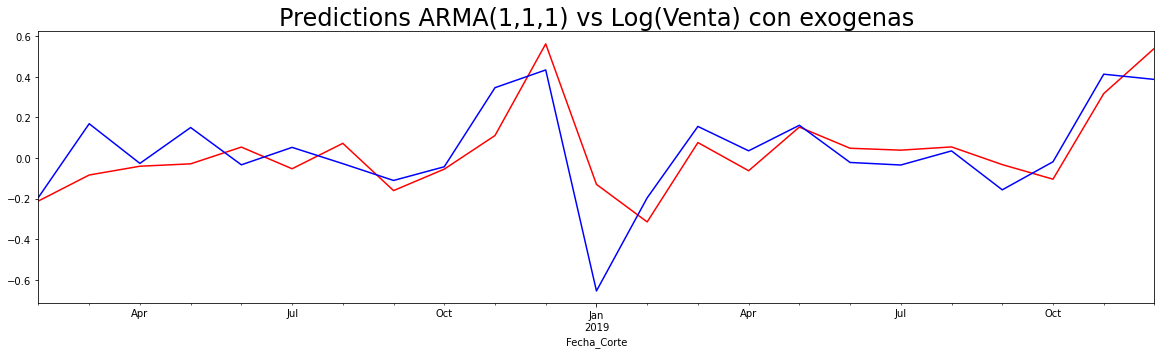

RMSE: 0.014410607737882336


In [ ]:
model_log_ar_2_Xspx = ARIMA(df_externas_mkt.Ventas_log,exog = df_externas_mkt[['Ventas_log']],  order=(1,1,1))
results_log_ar_2_Xspx = model_log_ar_2_Xspx.fit()

df_pred_log_ar_2_Xspx = results_log_ar_2_Xspx.predict(start = start_date, end = end_date, 
                                          exog = df_externas_mkt[["Tasa_Desempleo"]][start_date:end_date]) 
df_pred_log_ar_2_Xspx[start_date:end_date].plot(figsize = (20,5), color = "red")   
df_externas_mkt.Ventas_log_diff[start_date:end_date].plot(color = "blue")
plt.title("Predictions ARMA(1,1,1) vs Log(Venta) con exogenas", size = 24)
plt.show()

import math
print('RMSE:',
      math.sqrt((np.sum(df_pred_log_ar_2_Xspx[start_date:end_date]-df_externas_mkt.Ventas_log_diff[start_date:end_date]))**2/24))


# Auto Arima con las diferencias de Log(Ventas)

In [ ]:
df_externas_mkt.columns

Index(['Venta', 'Anuncios_exteriores', 'Marcas_exclusivas', 'Marketing_online',
       'medios_impresos', 'operacion_mkt', 'Otros', 'Periodico_Coppel',
       'produccion', 'promociones', 'Radio', 'Television', 'Tasa_Desempleo',
       'norm_Venta', 'norm_TasaDesempleo', 'returns', 'returns_2', 'returns_3',
       'Ventas_diff', 'Ventas_log', 'Ventas_log_diff', 'res_log_ar_2'],
      dtype='object')

In [ ]:
model_auto = auto_arima(df_externas_mkt.Ventas_log_diff[1:], exogenous = df_externas_mkt[['Anuncios_exteriores', 'Marcas_exclusivas', 'Marketing_online',
                                                                                          'medios_impresos', 'operacion_mkt', 'Otros', 'Periodico_Coppel', 
                                                                                          'produccion', 'promociones', 'Radio', 'Television', 
                                                                                          'Tasa_Desempleo']][1:],
                       m = 3, max_p = 9, max_q = 9, max_P = 9, max_Q = 9)

In [ ]:
model_auto

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 1, 3),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=False)

In [ ]:
df_auto_pred = pd.DataFrame(model_auto.predict(n_periods = len(df_externas_mkt[start_date:end_date]),
                            exogenous = df_externas_mkt[['Anuncios_exteriores', 'Marcas_exclusivas', 'Marketing_online',
                                                                                          'medios_impresos', 'operacion_mkt', 'Otros', 'Periodico_Coppel', 
                                                                                          'produccion', 'promociones', 'Radio', 'Television', 
                                                                                          'Tasa_Desempleo']][1:][start_date:end_date]),
                            index = df_externas_mkt[start_date:end_date].index)

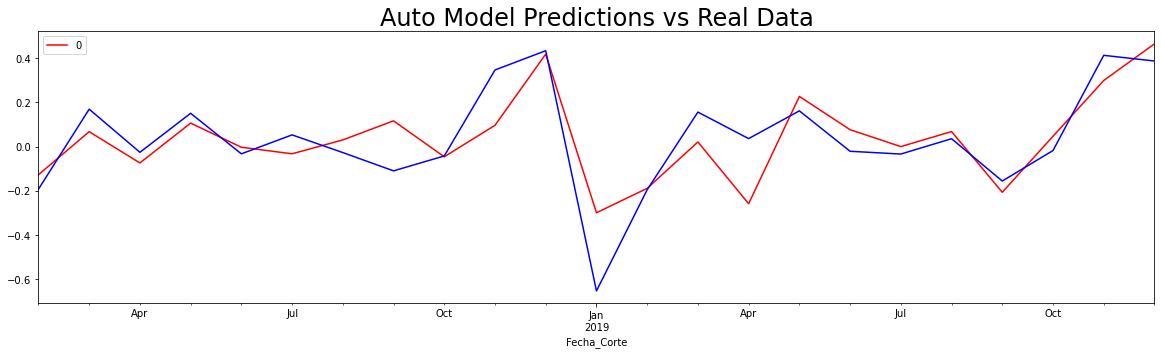

In [ ]:
df_auto_pred.plot(figsize = (20,5), color = "red")
df_externas_mkt.Ventas_log_diff[start_date:end_date].plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

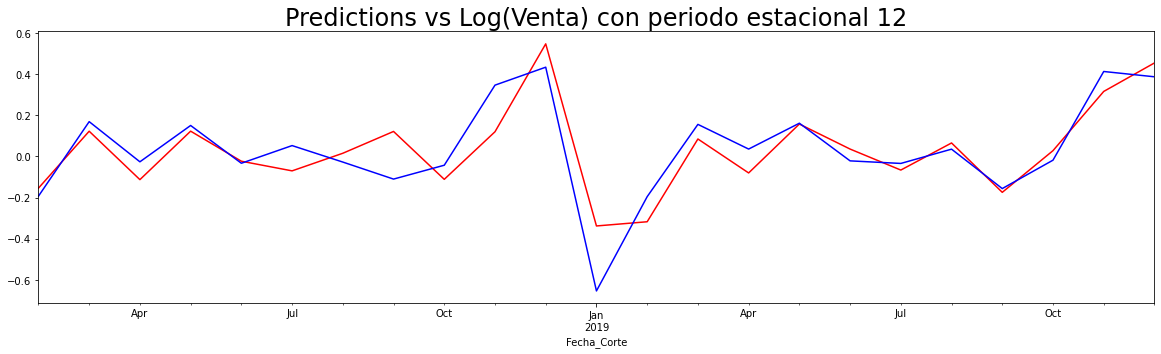

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_ar_1_i_1_ma_1_Xspx = SARIMAX(df_externas_mkt.Ventas_log_diff[1:], 
                                   exog = df_externas_mkt[['Anuncios_exteriores', 
                                                           'Marcas_exclusivas', 'Marketing_online',
                                                            'medios_impresos', 'operacion_mkt', 'Otros', 'Periodico_Coppel', 
                                                            'produccion', 'promociones', 'Radio', 'Television', 
                                                            'Tasa_Desempleo']][1:][start_date:end_date], order=(0,0,0),seasonal_order = (0,0,1,3))


results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()

df_pred_arma = results_ar_1_i_1_ma_1_Xspx.predict(start = start_date, end = end_date, 
                                          exog = df_externas_mkt[['Anuncios_exteriores', 'Marcas_exclusivas', 'Marketing_online',
                                                                                          'medios_impresos', 'operacion_mkt', 'Otros', 'Periodico_Coppel', 
                                                                                          'produccion', 'promociones', 'Radio', 'Television', 
                                                                                          'Tasa_Desempleo']][1:][start_date:end_date]) 
df_pred_arma[start_date:end_date].plot(figsize = (20,5), color = "red")   
df_externas_mkt.Ventas_log_diff[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Log(Venta) con periodo estacional 12", size = 24)
plt.show()

In [ ]:
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:           Ventas_log_diff   No. Observations:                   23
Model:             SARIMAX(0, 0, [1], 3)   Log Likelihood                  16.290
Date:                   Fri, 04 Sep 2020   AIC                             -4.581
Time:                           17:31:46   BIC                             11.316
Sample:                       02-28-2018   HQIC                            -0.583
                            - 12-31-2019                                         
Covariance Type:                     opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Anuncios_exteriores -6.515e-09   1.64e-08     -0.396      0.692   -3.87e-08    2.57e-08
Marcas_exclusivas    3.961e-08   4.19e-08      0.944      0.345   -4.26e-08    1.22e-07
Marketing_online    -1.363e-08   2.04e-08     -0.667      0.505   -5.37e-08    2.64e-08
medios_impresos      6.263e-08   8.07e-08      0.776      0.438   -9.56e-08    2.21e-07
operacion_mkt       -2.933e-09    3.3e-08     -0.089      0.929   -6.76e-08    6.18e-08
Otros                2.039e-08   5.71e-08      0.357      0.721   -9.14e-08    1.32e-07
Periodico_Coppel     4.427e-09   3.14e-09      1.409      0.159   -1.73e-09    1.06e-08
produccion          -6.499e-11   1.12e-08     -0.006      0.995   -2.19e-08    2.18e-08
promociones          6.838e-09    2.6e-08      0.263      0.792    -4.4e-08    5.77e-08
Radio                1.504e-08   4.36e-08      0.345      0.730   -7.03e-08       1e-07
Television          -5.341e-10   2.53e-09     -0.211      0.833    -5.5e-09    4.43e-09
Tasa_Desempleo         -0.1189      0.001   -160.292      0.000      -0.120      -0.117
ma.S.L3                -0.5697   3.77e-05  -1.51e+04      0.000      -0.570      -0.570
sigma2                  0.0171      0.010      1.747      0.081      -0.002       0.036
===================================================================================
Ljung-Box (Q):                       17.92   Jarque-Bera (JB):                 4.28
Prob(Q):                              0.71   Prob(JB):                         0.12
Heteroskedasticity (H):               0.28   Skew:                            -0.86
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.16e+22. Standard errors may be unstable.
"""

# Comparando modelos

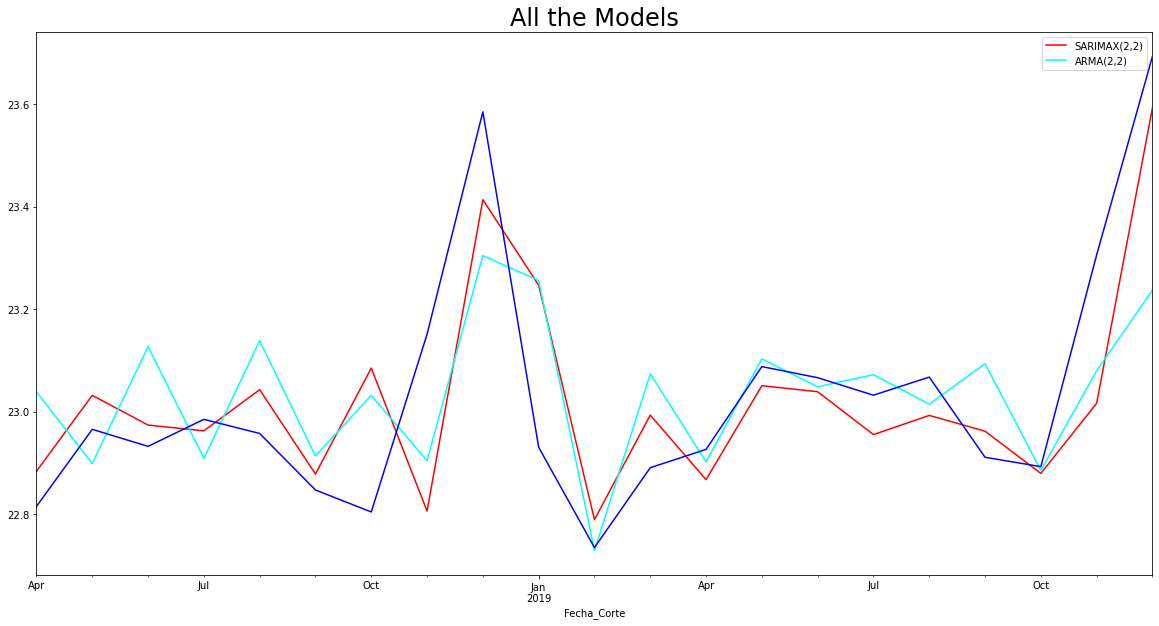

In [ ]:
df_pred_ar_2_i_0_ma_2_Xspx[start_date:end_date].plot(figsize = (20,10), color = "red")
df_pred_ar_2_i_0_ma_2 [start_date:end_date].plot(color = "cyan")
#df_pred_arma[start_date:end_date].plot(color = "cyan")
#df_pred_armax[start_date:end_date].plot(color = "green")
#df_pred_sarma[start_date:end_date].plot(color = "magenta")
#df_pred_sarimax[start_date:end_date].plot(color = "red")
df_Ventas.Ventas_log[start_date:end_date].plot(color = "blue")
plt.legend(['SARIMAX(2,2)','ARMA(2,2)'])
plt.title("All the Models", size = 24)
plt.show()

0.024253629829152235

In [ ]:
start_date =df_externas_mkt.index[0]
end_date =df_externas_mkt.index[23]

In [ ]:
df_externas_mkt.columns

Index(['Venta', 'Anuncios_exteriores', 'Marcas_exclusivas', 'Marketing_online',
       'medios_impresos', 'operacion_mkt', 'Otros', 'Periodico_Coppel',
       'produccion', 'promociones', 'Radio', 'Television', 'Tasa_Desempleo',
       'norm_Venta', 'norm_TasaDesempleo', 'returns', 'returns_2', 'returns_3',
       'Ventas_diff', 'Ventas_log', 'Ventas_log_diff'],
      dtype='object')

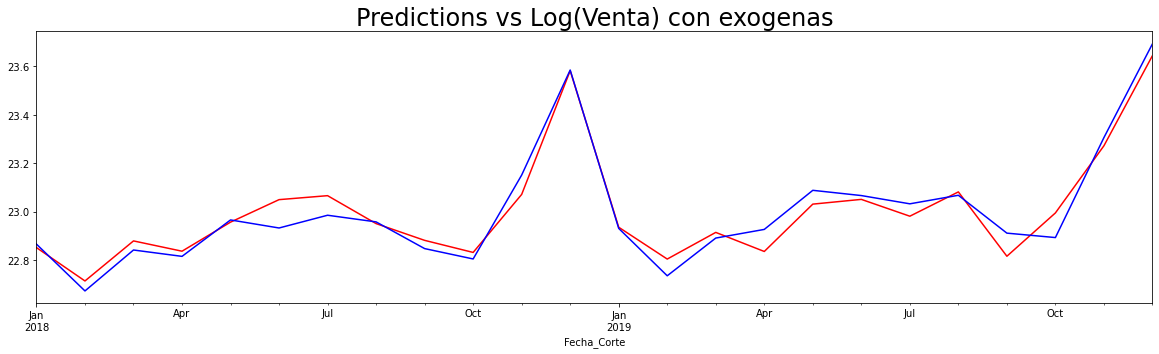

RMSE: 0.013380443856870598


In [ ]:
model_ar_2_i_0_ma_2_Xspx = ARIMA(df_externas_mkt.Ventas_log
                                 ,exog = df_externas_mkt[['Tasa_Desempleo','Anuncios_exteriores', 
                                                          'Marcas_exclusivas', 'Marketing_online',
                                                          'medios_impresos', 'operacion_mkt', 'Otros',
                                                          'Periodico_Coppel','produccion', 'promociones',
                                                          'Radio', 'Television']],  order=(2,0,2))

results_ar_2_i_0_ma_2_Xspx = model_ar_2_i_0_ma_2_Xspx.fit()

df_pred_ar_2_i_0_ma_2_Xspx = results_ar_2_i_0_ma_2_Xspx.predict(start = start_date, end = end_date, 
                                          exog = df_externas_mkt[['Tasa_Desempleo','Anuncios_exteriores', 
                                                          'Marcas_exclusivas', 'Marketing_online',
                                                          'medios_impresos', 'operacion_mkt', 'Otros',
                                                          'Periodico_Coppel','produccion', 'promociones',
                                                          'Radio', 'Television']][start_date:end_date]) 
df_pred_ar_2_i_0_ma_2_Xspx[start_date:end_date].plot(figsize = (20,5), color = "red")   
df_externas_mkt.Ventas_log[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Log(Venta) con exogenas", size = 24)
plt.show()

import math
print('RMSE:',
      math.sqrt((np.sum(df_pred_ar_2_i_0_ma_2_Xspx[start_date:end_date]-df_externas_mkt.Ventas_log[start_date:end_date]))**2/24))


In [ ]:
results_ar_2_i_0_ma_2_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Ventas_log   No. Observations:                   24
Model:                     ARMA(2, 2)   Log Likelihood                  34.981
Method:                       css-mle   S.D. of innovations              0.056
Date:                Fri, 04 Sep 2020   AIC                            -33.963
Time:                        16:38:41   BIC                            -12.758
Sample:                    01-31-2018   HQIC                           -28.337
                         - 12-31-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  21.6688      0.203    106.954      0.000      21.272      22.066
Tasa_Desempleo          0.2612      0.059      4.414      0.000       0.145       0.377
Anuncios_exteriores  5.693e-09        nan        nan        nan         nan         nan
Marcas_exclusivas   -1.066e-08        nan        nan        nan         nan         nan
Marketing_online     5.721e-09   1.28e-07      0.045      0.964   -2.46e-07    2.57e-07
medios_impresos      3.014e-08      1e-07      0.300      0.764   -1.67e-07    2.27e-07
operacion_mkt        1.825e-08        nan        nan        nan         nan         nan
Otros                3.446e-08        nan        nan        nan         nan         nan
Periodico_Coppel     3.821e-09        nan        nan        nan         nan         nan
produccion           4.083e-09        nan        nan        nan         nan         nan
promociones           8.33e-09   7.75e-08      0.108      0.914   -1.43e-07     1.6e-07
Radio               -1.094e-08   1.35e-07     -0.081      0.936   -2.76e-07    2.54e-07
Television           3.265e-10   1.27e-07      0.003      0.998   -2.49e-07    2.49e-07
ar.L1.Ventas_log       -0.2540      0.727     -0.349      0.727      -1.679       1.171
ar.L2.Ventas_log        0.1283      0.296      0.433      0.665      -0.452       0.709
ma.L1.Ventas_log       -0.2096      0.897     -0.234      0.815      -1.967       1.548
ma.L2.Ventas_log       -0.3310        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9724           +0.0000j            1.9724            0.5000
AR.2            3.9521           +0.0000j            3.9521            0.0000
MA.1            1.4502           +0.0000j            1.4502            0.0000
MA.2           -2.0834           +0.0000j            2.0834            0.5000
-----------------------------------------------------------------------------
"""